In [21]:
# install.packages("tidyverse")
library(ggplot2)

In [22]:
dataFull <- read.csv("mdpv4.csv", header=TRUE)
dataFull <- dataFull[dataFull$alpha <= 1, ]

In [23]:
# data0 <- data[data$trial == 0,]
# data1 <- data[data$trial == 1,]
# data2 <- data[data$trial == 2,]

data <- dataFull[dataFull$trial == 0 & dataFull$alpha == 0.4 & dataFull$syncBackups == 1,]

In [24]:
head(data, 2)

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
81,10,0.4,0.6,0,4,1,True,3701,0,30300,⋯,1275.329,30294,30300,2119.566,4074.901,0.5557704,0.4650989,18.827515,299,30199
147,10,0.4,0.6,1,2,1,True,3701,0,30300,⋯,1459.162,30802,30300,2122.364,3898.605,0.8728514,1.0734969,7.375269,299,30199


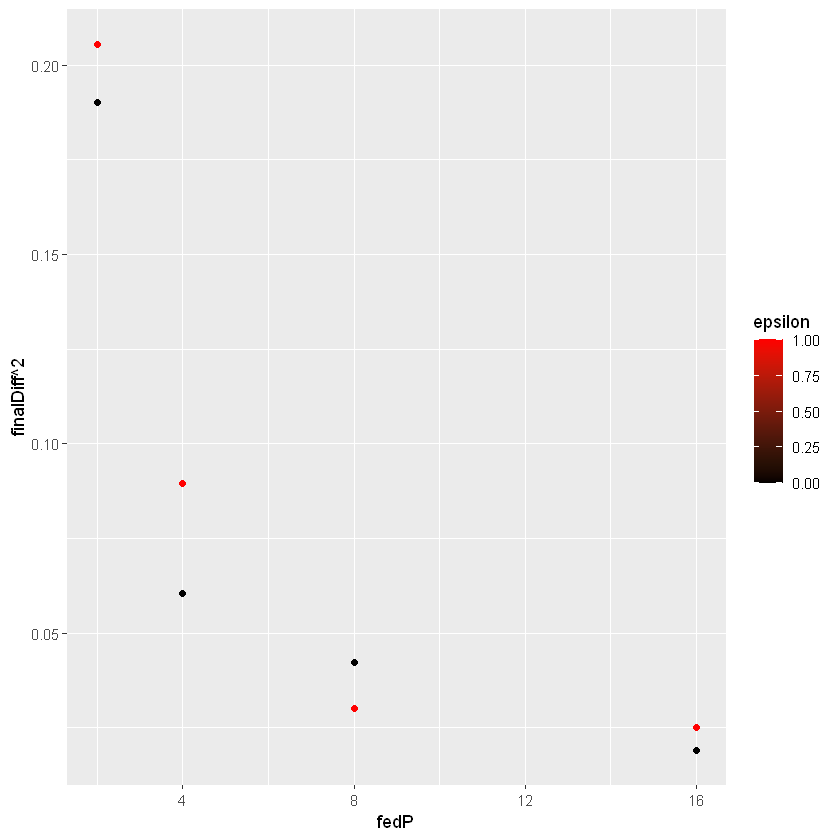

In [25]:
ggplot(dataFull[dataFull$trial == 0 & dataFull$alpha == 0.1 & dataFull$syncBackups == 1,], 
       aes(x=fedP, y=finalDiff ** 2)) + geom_point(aes(colour = epsilon)) + scale_color_gradientn(colors = c("black", "red"))

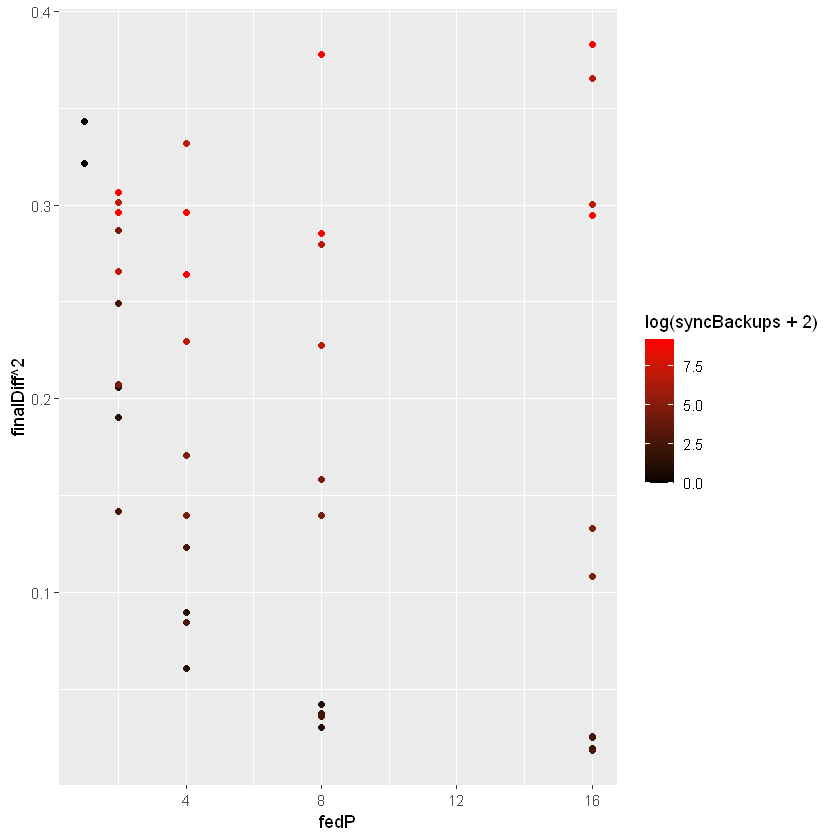

In [26]:
ggplot(dataFull[dataFull$trial == 0 & dataFull$alpha == 0.1,], 
       aes(x=fedP, y=finalDiff ** 2)) + geom_point(aes(color = log(syncBackups + 2))) + scale_color_gradientn(colors = c("black", "red"))

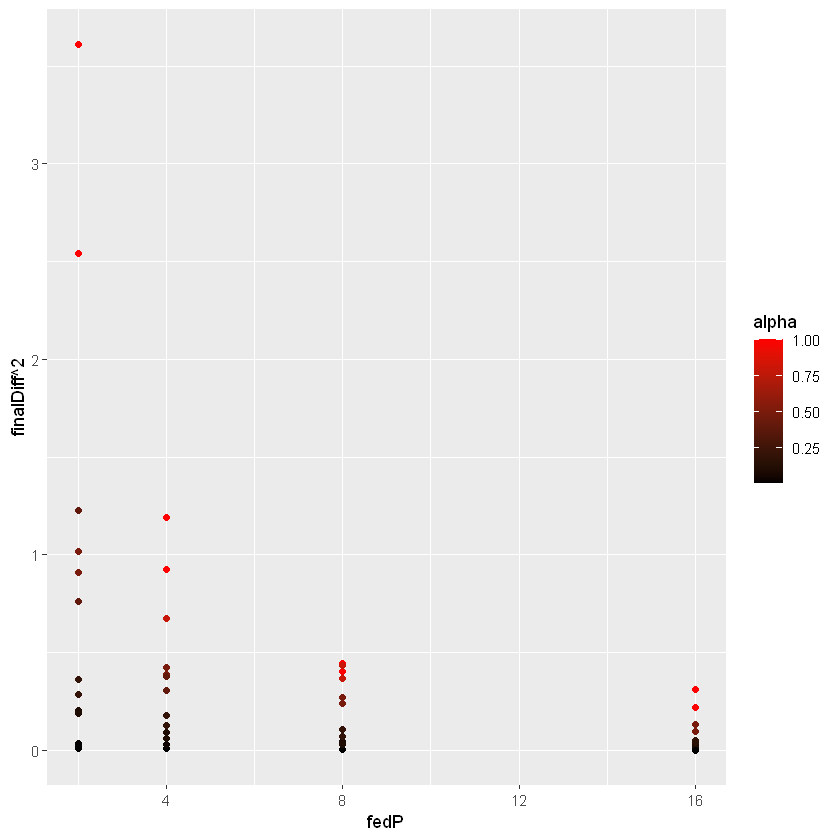

In [27]:
ggplot(dataFull[dataFull$trial == 0 & dataFull$syncBackups == 1,], 
       aes(x=fedP, y=finalDiff ** 2)) + geom_point(aes(color = alpha)) + scale_color_gradientn(colors = c("black", "red"))

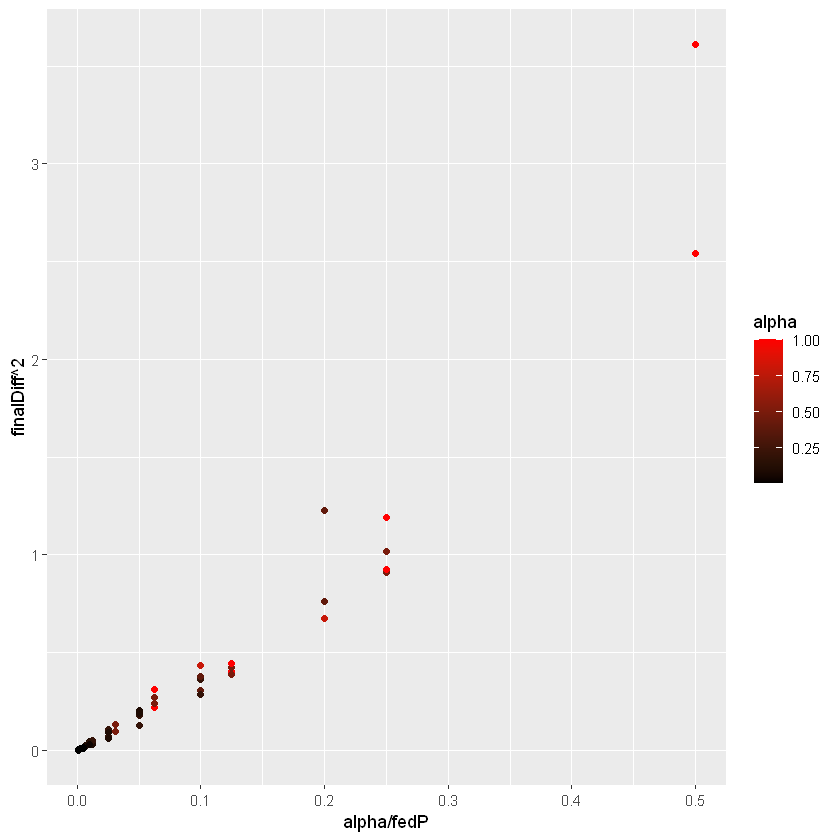

In [28]:
ggplot(dataFull[dataFull$trial == 0 & dataFull$syncBackups == 1,], 
       aes(x=alpha / fedP, y=finalDiff ** 2)) + geom_point(aes(color = alpha)) + scale_color_gradientn(colors = c("black", "red"))

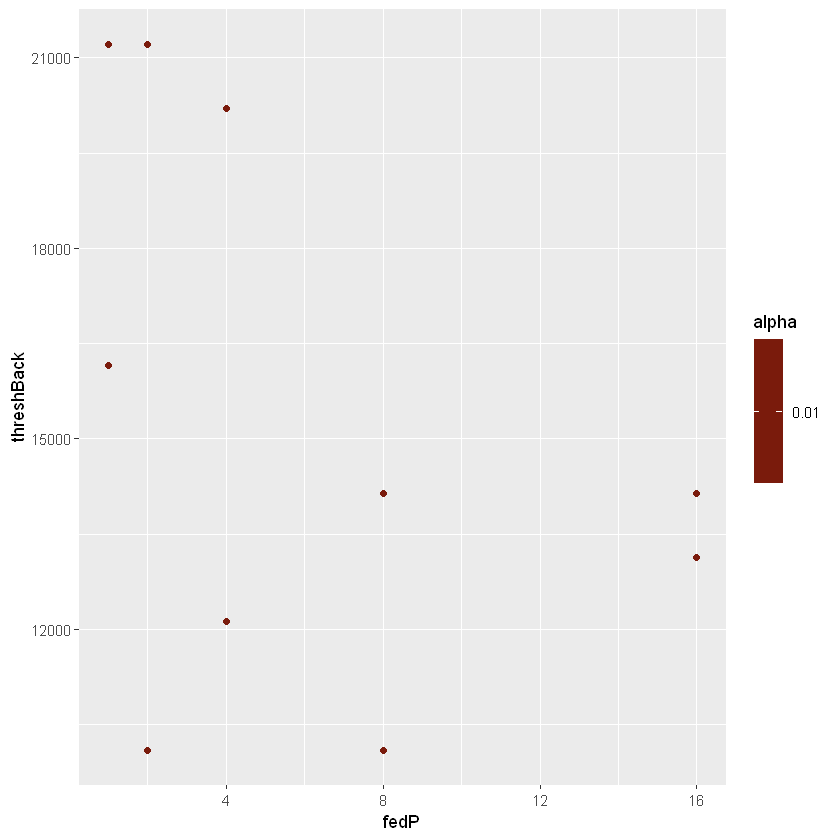

In [39]:
ggplot(dataFull[dataFull$trial == 0 & dataFull$syncBackups <= 1 & dataFull$threshDiff <= 0.1 & dataFull$alpha == 0.01,], 
       aes(x=fedP, y=threshBack)) + geom_point(aes(color = alpha)) + scale_color_gradientn(colors = c("black", "red"))